In [57]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics 
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [39]:
df = pd.read_csv("vegan_vegetarian_city_list.csv")
df.head()

,Unnamed: 0,city,population,area(km2),vegan_venue_count,vegetarian_venue_count
0,0,istanbul,15029231,5461.0,42,9
1,1,izmir,4320519,7340.0,15,3
2,2,ankara,4470800,2516.0,13,2
3,3,berlin,3748000,891.8,50,6
4,4,hamburg,5107429,196.0,11,0


In [40]:
scaler = StandardScaler()
cities = df.city

In [ ]:
df.drop(columns=["Unnamed: 0", "city"], inplace=True)
data = scaler.fit_transform(df)

In [50]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)     
      
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data.shape[0] 
    mapping2[k] = kmeanModel.inertia_


## Distortion

In [54]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 1.7082841363448205
2 : 1.121463042373436
3 : 0.9435569691641151
4 : 0.7845081246074415
5 : 0.6925154869872489
6 : 0.6201818306307445
7 : 0.5227789863113418
8 : 0.4589574022994927
9 : 0.40810401371920224


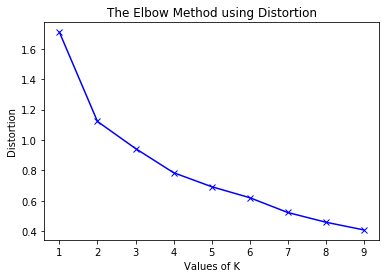

In [64]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion')
plt.show()

## Inertia

In [55]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 119.99999999999999
2 : 61.37845722464775
3 : 38.56968715674104
4 : 27.381814606088806
5 : 19.665827010899555
6 : 14.916840031769869
7 : 11.535243780316446
8 : 9.381782650373115
9 : 7.631413878346381


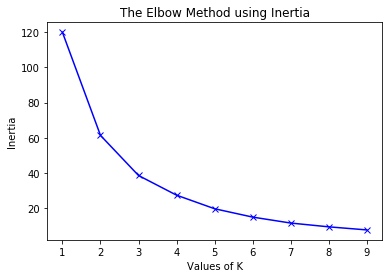

In [56]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN()
meanshift = MeanShift()

In [65]:
kmeans.fit(data)
dbscan.fit(data)
meanshift.fit(data)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [66]:
df["kmeans_clusters"] = kmeans.predict(data)
df["dbscan_clusters"] = dbscan.labels_
df["meanshift_clusters"] = meanshift.predict(data)

In [67]:
df["city"] = cities

In [77]:
result = df.drop(columns=["population", "area(km2)", "vegan_venue_count", "vegetarian_venue_count"])
result = result.set_index("city")

In [78]:
result

,kmeans_clusters,dbscan_clusters,meanshift_clusters
city,,,
istanbul,4,-1,2
izmir,2,-1,6
ankara,3,-1,0
berlin,3,-1,7
hamburg,3,-1,0
münih,0,0,0
london,1,-1,3
birmingham,0,0,0
washington,3,-1,1
